In [96]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [97]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
from sklearn.metrics import r2_score

In [100]:
df = pd.read_csv('data/HR_comma_sep.csv')

In [101]:
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [102]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [103]:
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [104]:
df.left.value_counts() / len(df)


0    0.761917
1    0.238083
Name: left, dtype: float64

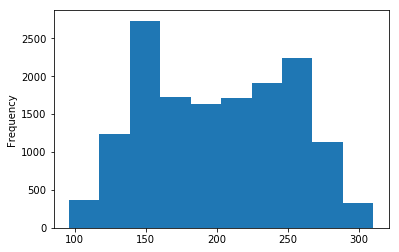

In [105]:
df['average_montly_hours'].plot(kind='hist')


In [106]:
df['average_montly_hours_100'] = df['average_montly_hours']/100.0


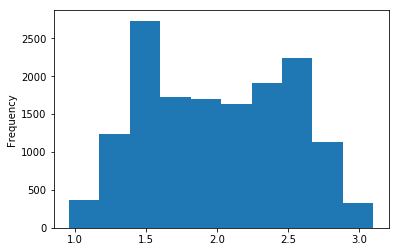

In [107]:
df['average_montly_hours_100'].plot(kind='hist')


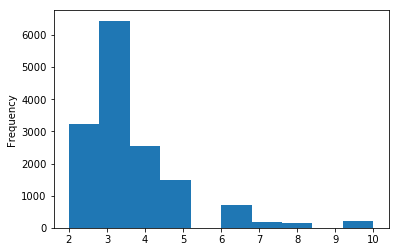

In [108]:
df['time_spend_company'].plot(kind='hist')


In [129]:
df_dummies = pd.get_dummies(df[['sales', 'salary']])


In [110]:
df_dummies.head()


,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [111]:
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100'],
      dtype='object')

In [112]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours_100']],
               df_dummies], axis=1).values
y = df['left'].values

In [113]:
X.shape


(14999, 20)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [115]:
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [116]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.fit(X_train, y_train)


Epoch 1/10
11999/11999 [==============================] - 0s - loss: 0.5793 - acc: 0.7586     
Epoch 2/10
11999/11999 [==============================] - 0s - loss: 0.5408 - acc: 0.7645     
Epoch 3/10
11999/11999 [==============================] - 0s - loss: 0.5359 - acc: 0.7630     
Epoch 4/10
11999/11999 [==============================] - 0s - loss: 0.5431 - acc: 0.7677     
Epoch 5/10
11999/11999 [==============================] - 0s - loss: 0.5487 - acc: 0.7632     
Epoch 6/10
11999/11999 [==============================] - 0s - loss: 0.5373 - acc: 0.7665     
Epoch 7/10
11999/11999 [==============================] - 0s - loss: 0.5430 - acc: 0.7646     
Epoch 8/10
11999/11999 [==============================] - 0s - loss: 0.5239 - acc: 0.7711     - ETA: 0s - loss: 0.5310 - acc: 0.76
Epoch 9/10
11999/11999 [==============================] - 0s - loss: 0.5344 - acc: 0.7686     
Epoch 10/10
11999/11999 [==============================] - 0s - loss: 0.5299 - acc: 0.7680     


In [118]:
y_test_pred = model.predict_classes(X_test)


2240/3000 [=====================>........] - ETA: 0s

In [119]:
from sklearn.metrics import confusion_matrix, classification_report


In [120]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [121]:
pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])


,Predicted Stay,Predicted Leave
Stay,2133,144
Leave,499,224


In [128]:
from keras.wrappers.scikit_learn import KerasClassifier

print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.81      0.94      0.87      2277
          1       0.61      0.31      0.41       723

avg / total       0.76      0.79      0.76      3000



In [123]:

def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=10, verbose=0)

In [124]:
from sklearn.model_selection import KFold, cross_val_score


In [125]:

cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7689 ± 0.0373
